# Exploratory Data Analysis 

## Import packages

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Import Data

In [2]:
#The data that was saved is now imported     
dataset = pd.read_excel('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')
dataset.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


## Type of variables we are dealing with

In [3]:
print(dataset.dtypes)

EmpNumber                       object
Age                              int64
Gender                          object
EducationBackground             object
MaritalStatus                   object
EmpDepartment                   object
EmpJobRole                      object
BusinessTravelFrequency         object
DistanceFromHome                 int64
EmpEducationLevel                int64
EmpEnvironmentSatisfaction       int64
EmpHourlyRate                    int64
EmpJobInvolvement                int64
EmpJobLevel                      int64
EmpJobSatisfaction               int64
NumCompaniesWorked               int64
OverTime                        object
EmpLastSalaryHikePercent         int64
EmpRelationshipSatisfaction      int64
TotalWorkExperienceInYears       int64
TrainingTimesLastYear            int64
EmpWorkLifeBalance               int64
ExperienceYearsAtThisCompany     int64
ExperienceYearsInCurrentRole     int64
YearsSinceLastPromotion          int64
YearsWithCurrManager     

# Department wise perfomance analysis

In [4]:
Counter(dataset.EmpDepartment)

Counter({'Sales': 373,
         'Human Resources': 54,
         'Development': 361,
         'Data Science': 20,
         'Research & Development': 343,
         'Finance': 49})

In [5]:
dep = list(Counter(dataset.EmpDepartment))
dep

['Sales',
 'Human Resources',
 'Development',
 'Data Science',
 'Research & Development',
 'Finance']

### We can conclude that there are 6 departments and that the sales department has the largest number of employees and Data science the lowest 

## Mean performance of all the departments

In [6]:
#Performance ratings for employees in Development department is the highest
dept=dataset.groupby(by='EmpDepartment')['PerformanceRating'].mean()
dept

EmpDepartment
Data Science              3.050000
Development               3.085873
Finance                   2.775510
Human Resources           2.925926
Research & Development    2.921283
Sales                     2.860590
Name: PerformanceRating, dtype: float64

### Development department has the highest performance rating and Finance department the lowest.

## Dataset distribution 
In Exploratory Data Analysis, it is important to look at how the features are distributed from one another. We will look at the numerical and categorical features 


##         1.For numerical features

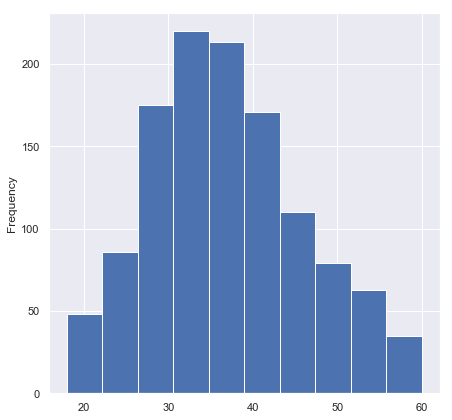

In [7]:
# Most of the employees are in the age group of 30–40
# We have few peoples in the age group of 55–60
sns.set(rc={'figure.figsize':(7,7)})
dataset["Age"].plot.hist()

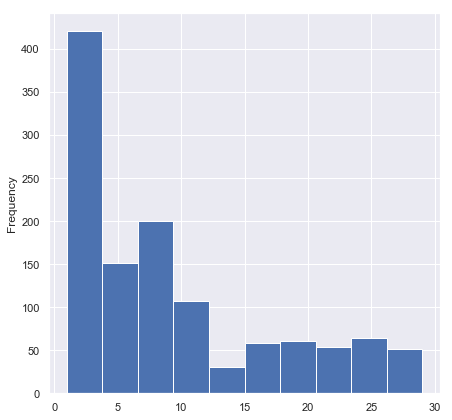

In [14]:
#The distance from home to office is distributing from 0 to 30 unit. Most of the employee come from the range 0 to 5 unit 
sns.set(rc={'figure.figsize':(7,7)})
dataset["DistanceFromHome"].plot.hist()

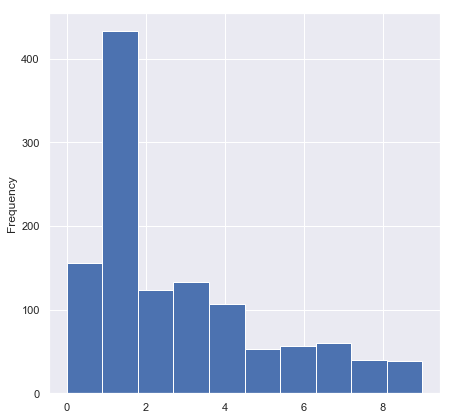

In [8]:
# The number of compagnies where employees worked is up to 8
sns.set(rc={'figure.figsize':(7,7)})
dataset["NumCompaniesWorked"].plot.hist()


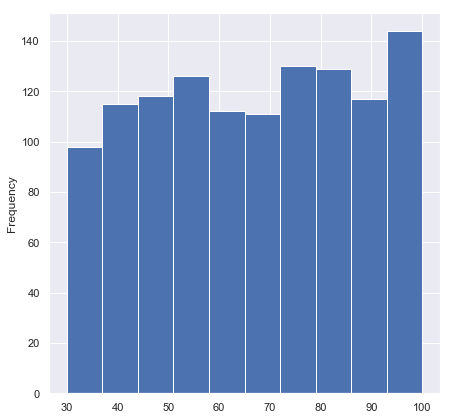

In [109]:
# For most of the employees,the hourly rate range is 65 to 95 
sns.set(rc={'figure.figsize':(7,7)})
dataset["EmpHourlyRate"].plot.hist()


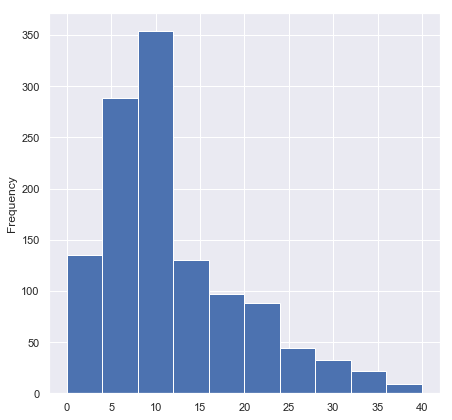

In [9]:
# Most of the employees work up to 5 years
sns.set(rc={'figure.figsize':(7,7)})
dataset["TotalWorkExperienceInYears"].plot.hist()

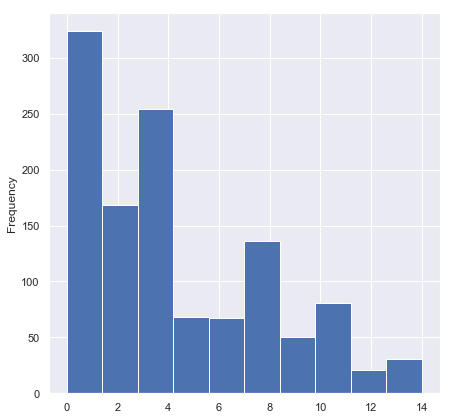

In [56]:
# For most of the employees, the salary hike go from 11% to 15%
sns.set(rc={'figure.figsize':(7,7)})
dataset["EmpLastSalaryHikePercent"].plot.hist()

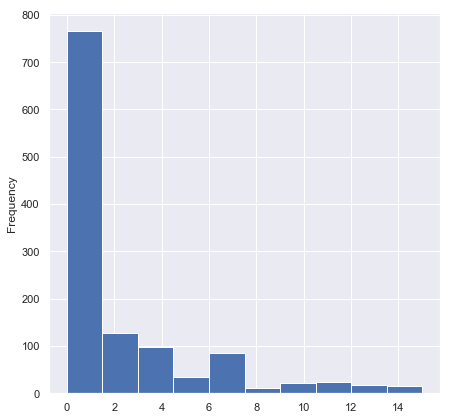

In [132]:
# Many employees were prmoted in  the last 0–1.5 years 
# Employees were regularly promoted
sns.set(rc={'figure.figsize':(7,7)})
dataset["YearsSinceLastPromotion"].plot.hist()

##   2.For Categorical Features 

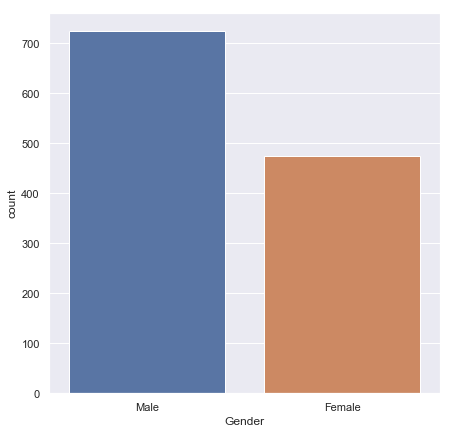

In [10]:
# Distribution of Categorical features
#We calculate and see that there is almost 60% of Male employees and 40% of Female employees.
sns.set(rc={'figure.figsize':(7,7)})
sns.countplot(x="Gender", data=dataset)

We have six unique educational backgrounds among employees
In the company, we have nineteen unique employee job roles.<br>
Most of the employees are not having attrition in their work


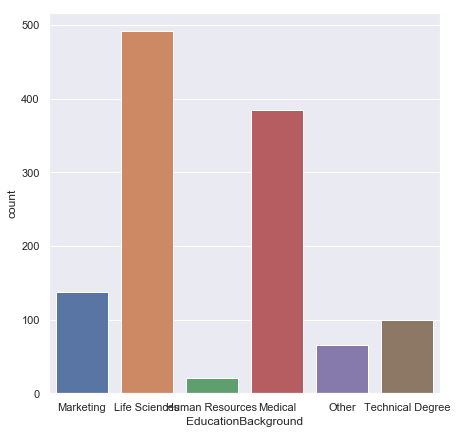

In [11]:
# Life Sciences is education background of the greatest number of employees, followed by Medical.
#We have six unique educational backgrounds among employees In the company
sns.set(rc={'figure.figsize':(7,7)})
sns.countplot(x="EducationBackground", data=dataset)

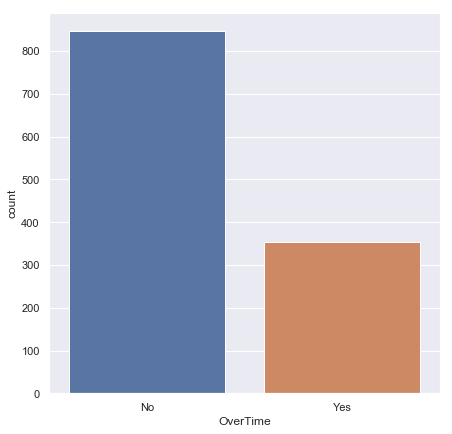

In [12]:
# There are almost 30% of the employees doing overtime  .
sns.set(rc={'figure.figsize':(7,7)})
sns.countplot(x="OverTime", data=dataset)

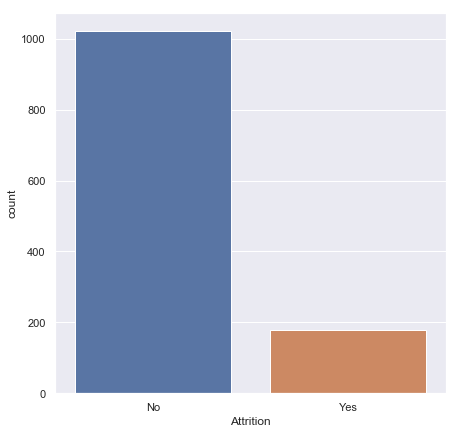

In [119]:
# Most of the employees are not having attrition  .
sns.set(rc={'figure.figsize':(7,7)})
sns.countplot(x="Attrition", data=dataset)

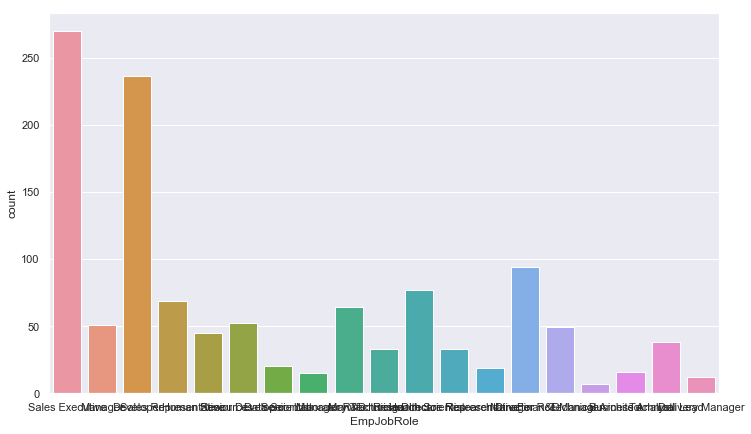

In [127]:
#we have nineteen unique employee job roles
sns.set(rc={'figure.figsize':(12,7)})
sns.countplot(x='EmpJobRole',data=dataset)

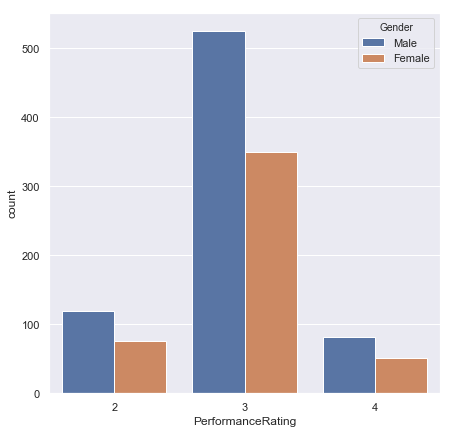

In [130]:
#Most of the employees have the performance rating of 3
#There are more men than women in all ratings
sns.set(rc={'figure.figsize':(7,7)})
sns.countplot(x='PerformanceRating',hue='Gender',data=dataset)#Performance Rating with respect to Gender

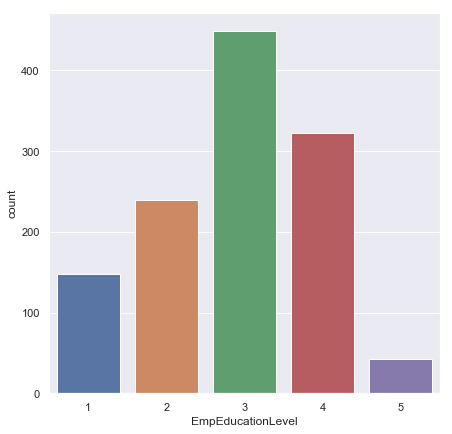

In [9]:
#Education level is 3 for most of the employees
sns.set(rc={'figure.figsize':(7,7)})
sns.countplot(x='EmpEducationLevel',data=dataset)

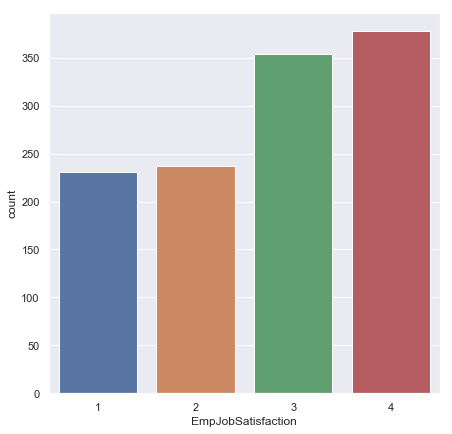

In [11]:
#For most of the employees, job satisfaction is very high
sns.set(rc={'figure.figsize':(7,7)})
sns.countplot(x='EmpJobSatisfaction',data=dataset)

## Data transformation 
Label Encoder class is used to convert the categorical text data into model-understandable numerical data.

In [13]:
le = LabelEncoder()
for i in (2,3,4,5,6,7,16,26):
    dataset.iloc[:,i] = le.fit_transform(dataset.iloc[:,i])
dataset.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,1,2,2,5,13,2,10,3,...,4,10,2,2,10,7,0,8,0,3
1,E1001006,47,1,2,2,5,13,2,14,4,...,4,20,2,3,7,7,1,7,0,3
2,E1001007,40,1,1,1,5,13,1,5,4,...,3,20,2,3,18,13,1,12,0,4
3,E1001009,41,1,0,0,3,8,2,10,4,...,2,23,2,2,21,6,12,6,0,3
4,E1001010,60,1,2,2,5,13,2,16,4,...,4,10,1,3,2,2,2,2,0,3


## Removing unnecessary data

In [14]:
#EmpNumber is irrelevant to data analysis 
dataset.drop('EmpNumber', axis=1, inplace=True)
dataset.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,1,2,2,5,13,2,10,3,4,...,4,10,2,2,10,7,0,8,0,3
1,47,1,2,2,5,13,2,14,4,4,...,4,20,2,3,7,7,1,7,0,3
2,40,1,1,1,5,13,1,5,4,4,...,3,20,2,3,18,13,1,12,0,4
3,41,1,0,0,3,8,2,10,4,2,...,2,23,2,2,21,6,12,6,0,3
4,60,1,2,2,5,13,2,16,4,1,...,4,10,1,3,2,2,2,2,0,3


##  correlation matrix heatmap

we can  use the call .corr which by default compute pairwise correlation of columns.Correlation states how the features are related to each other or the target variable. Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)Because we have many columns,a good way to quickly check correlations among columns is by visualizing the correlation matrix as a heatmap.Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

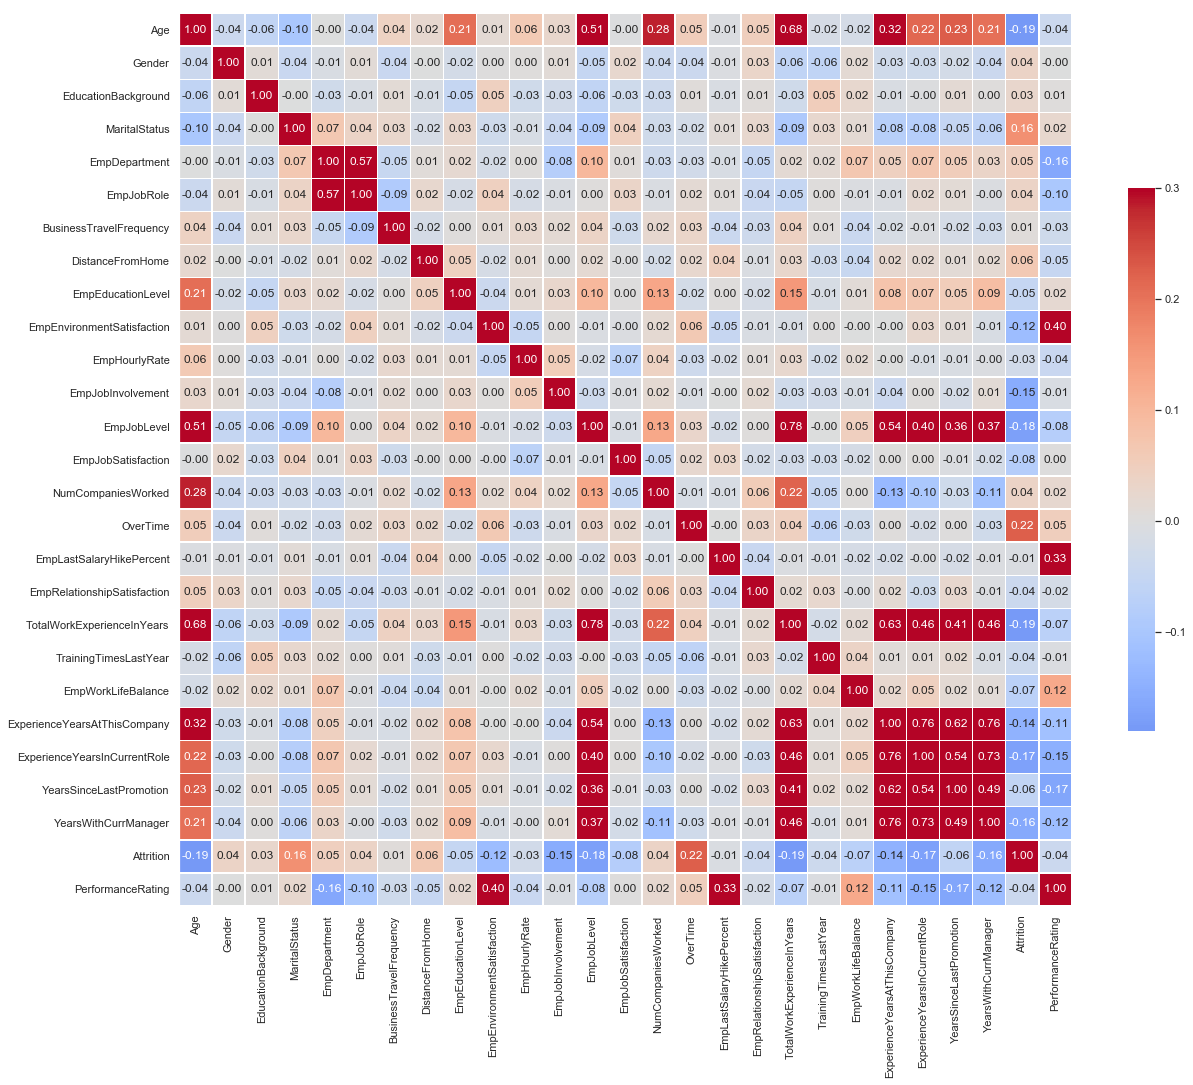

In [15]:
corr = dataset.corr()
g = sns.heatmap(corr,  vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
sns.despine()
g.figure.set_size_inches(20,20)
plt.show()

To get features that can affect performance,we will select those which the correlation coeffecient with Performance Rating is more than than 0.1.<br>Based on that statement, we can select:<br>
.EmpDepartment(negatively correlated)<br>
.ExperienceYearsAtThisCompany(negatively correlated)<br>
.ExperienceYearsInCurrentRole(negatively correlated)<br>
.YearsSinceLastPromotion(negatively correlated)<br>
.YearsWithCurrManager(negatively correlated)<br>
.EmpJobRole(negatively correlated)<br>
.EmpWorkLifeBalance(positively correlated)<br>
.EmpEnvironmentSatisfaction(positively correlated)<br>
.EmpLastSalaryHikePercent(positively correlated).<br>


In [16]:
#saving data
dataset.to_csv('INX_Future_Inc_Employee_Performance_Exploratory.csv',index=False)